## 필요한 모듈 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 데이터 수집

In [2]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()
diab

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [17]:
#describe 데이터 설명
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## 데이터 준비

In [18]:
# 1) 데이터프레임을 생성하여 X, y를 만드는 방법
diab_df = pd.DataFrame(diab.data, columns=diab.feature_names)

# progress 컬럼을 target으로 설정
diab_df["progress"] = diab.target 
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [10]:
# 1열의 배열
X = np.array(diab_df["bmi"]).reshape(-1, 1)   

y = np.array(diab_df['progress'])
X, y

(array([[ 0.06169621],
        [-0.05147406],
        [ 0.04445121],
        [-0.01159501],
        [-0.03638469],
        [-0.04069594],
        [-0.04716281],
        [-0.00189471],
        [ 0.06169621],
        [ 0.03906215],
        [-0.08380842],
        [ 0.01750591],
        [-0.02884001],
        [-0.00189471],
        [-0.02560657],
        [-0.01806189],
        [ 0.04229559],
        [ 0.01211685],
        [-0.0105172 ],
        [-0.01806189],
        [-0.05686312],
        [-0.02237314],
        [-0.00405033],
        [ 0.06061839],
        [ 0.03582872],
        [-0.01267283],
        [-0.07734155],
        [ 0.05954058],
        [-0.02129532],
        [-0.00620595],
        [ 0.04445121],
        [-0.06548562],
        [ 0.12528712],
        [-0.05039625],
        [-0.06332999],
        [-0.03099563],
        [ 0.02289497],
        [ 0.01103904],
        [ 0.07139652],
        [ 0.01427248],
        [-0.00836158],
        [-0.06764124],
        [-0.0105172 ],
        [-0

In [11]:
# 2) diab의 ndarray자료를 그대로 이용하는 방법

#독립변수 X: 모든 행의 bmi 컬럼 값만 넣음
X = diab.data[:, 2]

#종속변수 y: progress 컬럼
y = diab.target

X, y


(array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
        -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
        -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
        -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
        -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
        -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
         0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
        -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
        -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
        -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
        -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
        -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
        -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
        -0.02452876, -0.01806189, -0.01482845, -0.0

In [12]:
#독립변수 X를 1열로 재배열
X = X.reshape(-1, 1)
X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [13]:
# 랜덤으로 훈련세트와 테스트세트 분리; 훈련70% 테스트30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
# 단순 선형회귀
reg1 = LinearRegression()           # 선형회귀 변수선언
reg1.fit(X_train, y_train)          # 훈련시키기
y_pred1 = reg1.predict(X_test)      # 테스트세트의X 값에 대한 y의 예측값

print(reg1.coef_, reg1.intercept_)  # 선형회귀의 회귀계수(기울기)와 절편 출력
r2_score(y_test, y_pred1)           # 결정계수 0 <= r2_score <= 1

[1030.62089764] 151.41241649570435


0.18642576043332115

In [15]:
# 2차 다항회귀
poly = PolynomialFeatures(degree=2)                # 2차다항회귀 변수선언
poly.fit(X_train)                                  # 훈련시키기
X2_train = poly.transform(X_train)                 # 단순선형회귀 훈련세트의 X값을 2차다항회귀 훈련세트로 변환
X2_test= poly.transform(X_test)                    # 단순선형회귀 테스트세트의 X값을 2차다항회귀 테스트세트로 변환

reg2 = LinearRegression().fit(X2_train, y_train)   # 2차다항회귀 훈련세트를 훈련시킴
y_pred2 = reg2.predict(X2_test)                    # 테스트세트 X2 에 대한 y의 예측값

print(reg2.coef_, reg2.intercept_)                 # 훈련세트의 회귀계수(기울기)와 절편
r2_score(y_test, y_pred2)                          # 결정계수

[   0.         1050.83706958 -653.92421733] 152.8907776697623


0.17951486207090928

In [16]:
# 3차 다항회귀
poly = PolynomialFeatures(degree=3)                # 3차다항회귀 변수선언
poly.fit(X_train)                                  # 훈련시키기
X3_train= poly.transform(X_train)                  # 단순선형회귀 훈련세트의 X값을 3차다항회귀 훈련세트로 변환
X3_test = poly.transform(X_test)                   # 단순선형회귀 테스트세트의 X값을 3차다항회귀 테스트세트로 변환

reg3 = LinearRegression().fit(X3_train, y_train)   # 3차다항회귀 훈련세트를 훈련시킴
y_pred3 = reg3.predict(X3_test)                    # 테스트세트 X3에 대한 y의 예측값

print(reg3.coef_, reg3.intercept_)                 # 훈련세트의 회귀계수(기울기)와 절편
r2_score(y_test, y_pred3)                          # 결정계수

[     0.           1165.7743567    1091.6819689  -23860.15928314] 150.37485053779793


0.16694827651867383

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


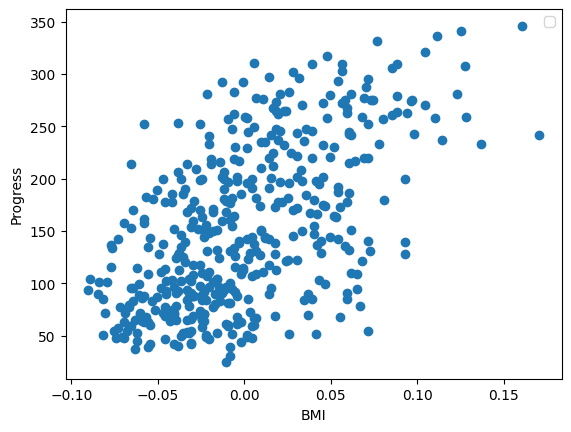

In [22]:
plt.scatter(X, y)
plt.plot(,y_pred3,)
plt.xlabel('BMI')
plt.ylabel('Progress')
plt.legend()
plt.show()